In [5]:
import numpy as np
import keras
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import matplotlib.pyplot as plt

from keras.layers import Flatten,Conv2D,MaxPool2D,Dense
from keras import Sequential

In [6]:
data_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=45,
    validation_split=0.1,
    shear_range=10
)

In [7]:
train_generator = data_gen.flow_from_directory("./Eyes/train/",shuffle=True,subset='training',target_size=(28,28),batch_size=64)
valid_generator = data_gen.flow_from_directory("./Eyes/train/",shuffle=True,subset='validation',target_size=(28,28))
test_generator = data_gen.flow_from_directory("./Eyes/test/",target_size=(28,28),batch_size=218)

Found 1112 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


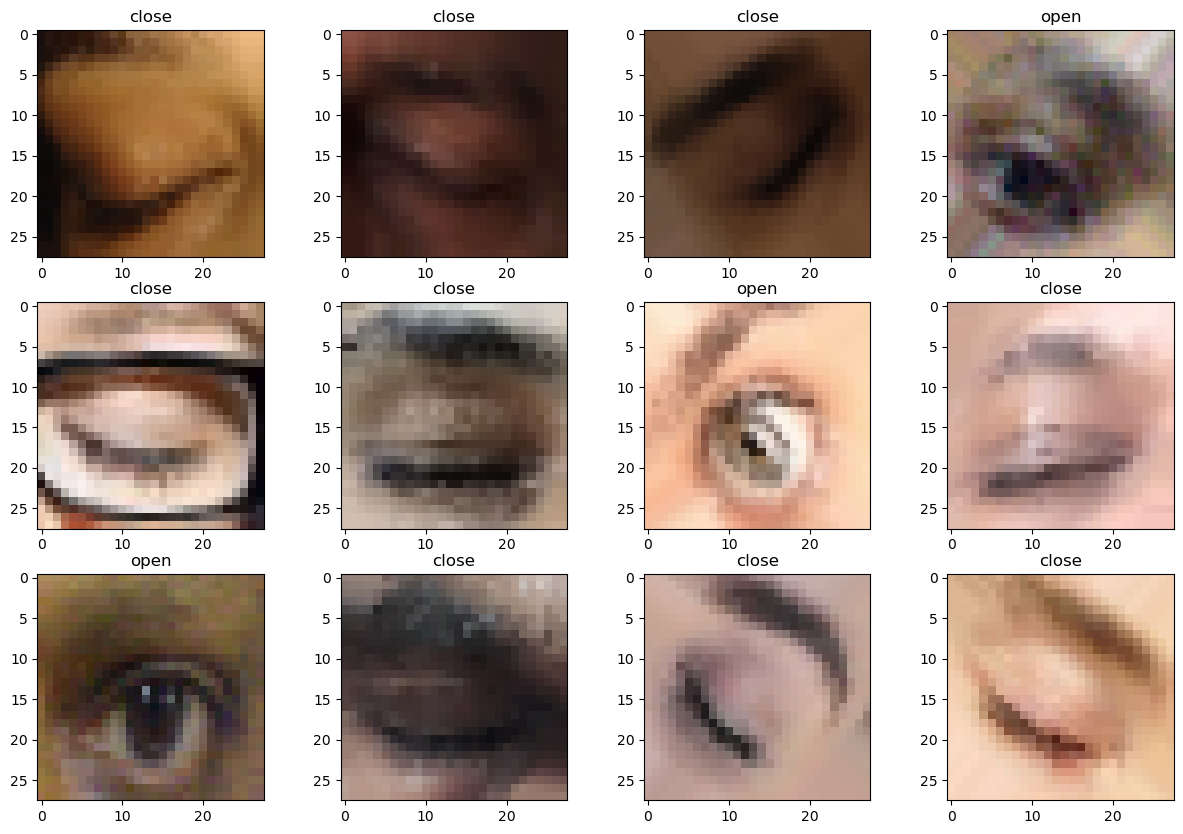

In [34]:
fig, ax = plt.subplots(3,4,figsize=(15,10))
axf = ax.flatten()
xf,yf = train_generator.__getitem__(0)
classes=['close','open']
for i in range(12):
    axf[i].imshow(xf[i])
    axf[i].set_title(classes[yf[i].argmax()])

In [40]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=50,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [41]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_25 (Dense)            (None, 50)               

In [42]:
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(),metrics=['acc'])

In [43]:
history = model.fit(train_generator,epochs=15,validation_data=valid_generator)

Epoch 1/15
18/18 [==============================] - 5s 246ms/step - loss: 0.6637 - acc: 0.6079 - val_loss: 0.5659 - val_acc: 0.8279
Epoch 2/15
18/18 [==============================] - 4s 229ms/step - loss: 0.4992 - acc: 0.7833 - val_loss: 0.3304 - val_acc: 0.9098
Epoch 3/15
18/18 [==============================] - 4s 243ms/step - loss: 0.2567 - acc: 0.9155 - val_loss: 0.2864 - val_acc: 0.8689
Epoch 4/15
18/18 [==============================] - 4s 216ms/step - loss: 0.1993 - acc: 0.9209 - val_loss: 0.2062 - val_acc: 0.9098
Epoch 5/15
18/18 [==============================] - 4s 230ms/step - loss: 0.1580 - acc: 0.9460 - val_loss: 0.1788 - val_acc: 0.9344
Epoch 6/15
18/18 [==============================] - 5s 243ms/step - loss: 0.1376 - acc: 0.9487 - val_loss: 0.1977 - val_acc: 0.9016
Epoch 7/15
18/18 [==============================] - 5s 256ms/step - loss: 0.1382 - acc: 0.9469 - val_loss: 0.1892 - val_acc: 0.9180
Epoch 8/15
18/18 [==============================] - 5s 258ms/step - loss: 0.

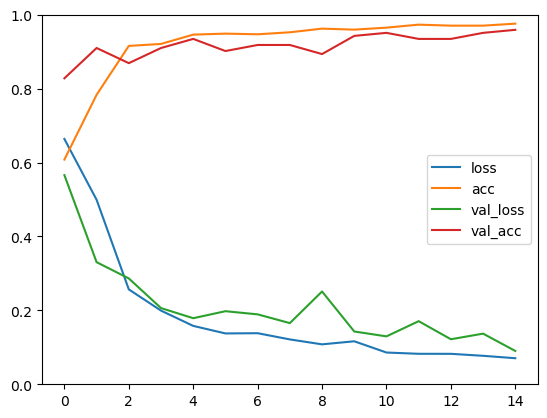

In [44]:
plt.plot(pd.DataFrame(history.history),label=history.history.keys())
plt.ylim((0,1))
plt.legend()

In [48]:
model.evaluate(test_generator)

7/7 [==============================] - 1s 161ms/step - loss: 0.0869 - acc: 0.9679


[0.08693721890449524, 0.9678899049758911]

In [25]:
model.save("./models/eyes.h5")

In [1]:
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2023-05-28 19:34:44.327405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 19:34:44.791391: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 19:34:44.846371: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-28 19:34:44.846399: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
model = keras.models.load_model("./models/eyes.h5")

In [8]:
X_test,y_test = test_generator.__getitem__(0)

In [9]:
classes = ['closed','open']

7/7 [==============================] - 0s 6ms/step


Text(50.722222222222214, 0.5, 'y_true')

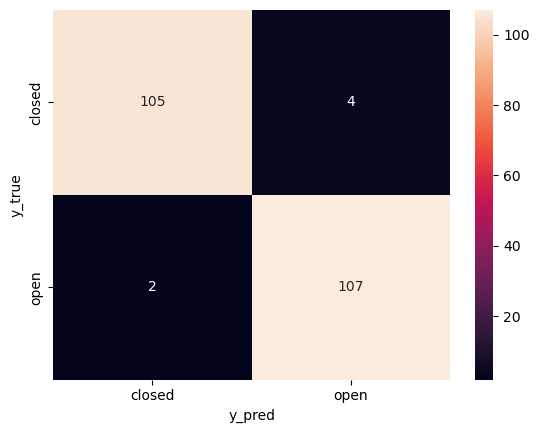

In [10]:
cf_matrix = confusion_matrix(y_test.argmax(axis=1),model.predict(X_test).argmax(axis=1))
sns.heatmap(cf_matrix, annot=True, xticklabels=classes,yticklabels=classes,fmt='')
plt.xlabel("y_pred")
plt.ylabel("y_true")

In [11]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [12]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 8ms/step


In [14]:
rscore = recall_score(y_test.argmax(axis=1),predictions.argmax(axis=1))
pscore = precision_score(y_test.argmax(axis=1),predictions.argmax(axis=1))
fscore = f1_score(y_test.argmax(axis=1),predictions.argmax(axis=1))

In [15]:
print("recall:",rscore)
print("precision:",pscore)
print("F score:",fscore)

recall: 0.981651376146789
precision: 0.963963963963964
F score: 0.9727272727272728
